In [1]:
import pid_df
import matplotlib.pyplot as plt
from seaborn import pairplot

pid = pid_df.pid_df('../SingleTracks/kp_geant3_tracks_30274-30795.csv','kp',0.01)
pid.add_df('../SingleTracks/pip_geant3_tracks_30274-30795.csv','pip',0.01)

0.01
0.01


In [2]:
for feature in pid.pid.columns:
    print(pid.pid[feature].tail(10))

15706    9412
15707    3377
15708    3456
15709    1550
15710    5048
15711    6648
15712    5697
15713    2399
15714    3757
15715     890
Name: eventnumber, dtype: int64
15706    1.871140
15707    0.611031
15708    4.549580
15709    4.993940
15710    5.245330
15711    0.958485
15712    0.712650
15713    3.367310
15714    0.559738
15715    0.412352
Name: p_true, dtype: float64
15706    1.876340
15707    0.626769
15708    4.551720
15709    4.995890
15710    5.247190
15711    0.968594
15712    0.726189
15713    3.370200
15714    0.576876
15715    0.435332
Name: E_true, dtype: float64
15706    0.019908
15707    0.061442
15708    1.321540
15709    0.047852
15710    0.227865
15711    0.128985
15712    0.100305
15713    0.816808
15714    0.099772
15715    0.585209
Name: theta_true, dtype: float64
15706    1.024090
15707   -1.687280
15708   -2.486040
15709    1.561730
15710    3.130360
15711   -0.425589
15712    0.415936
15713    0.481185
15714    0.010133
15715    1.501640
Name: phi_true, d

In [3]:
SC_features = []
for feature in pid.pid.columns:
    if 'SC' in feature:
        if 'Variance' in feature:
            continue
        SC_features.append(feature)

TOF_features = []
for feature in pid.pid.columns:
    if 'TOF' in feature or 'TOP' in feature:
        if 'Variance' in feature:
            continue
        TOF_features.append(feature)

BCAL_features = []
for feature in pid.pid.columns:
    if 'BCAL' in feature:
        if 'Cut' in feature:
            continue
        BCAL_features.append(feature)

FCAL_features = []
for feature in pid.pid.columns:
    if 'FCAL' in feature:
        if 'Variance' in feature:
            continue
        FCAL_features.append(feature)

FDC_features = []
for feature in pid.pid.columns:
    if 'fdc' in feature or 'FDC' in feature or 'track' in feature:
        FDC_features.append(feature)

CDC_features = []
for feature in pid.pid.columns:
    if 'cdc' in feature or 'CDC' in feature or 'track' in feature:
        CDC_features.append(feature)
    
lo_features = []
for feature in pid.pid.columns:
    if feature not in SC_features and feature not in TOF_features and feature not in BCAL_features and feature not in FCAL_features and feature not in CDC_features and feature not in FDC_features:
        if 'Variance' in feature:
            continue
        if 'Cut' in feature:
            continue
        if feature == 't0_err' or feature == 't0_detector' or feature == 'charge_true':
            continue
        if feature == 'mass_true':
            continue
        lo_features.append(feature)
lo_features = lo_features[5:len(lo_features)-1]
        
print(SC_features)
print(TOF_features)
print(BCAL_features)
print(FCAL_features)
print(FDC_features)
print(CDC_features)
print(lo_features)

['sector_SC', 'hitTime_SC', 'dEdx_SC', 'flightTime_SC', 'pathLength_SC', 'deltaPhiToHit_SC']
['hitTime_TOF', 'hitEnergy_TOF', 'dEdx_TOF', 'flightTime_TOF', 'pathLength_TOF', 'deltaXToHit_TOF', 'deltaYToHit_TOF', 'distanceToTrack_TOF', 'xPositionWellDefined_TOF', 'yPositionWellDefined_TOF']
['distanceToTrack_BCAL', 'dx_BCAL', 'flightTime_BCAL', 'flightTimeVariance_BCAL', 'pathLength_BCAL', 'deltaPhitoShower_BCAL', 'deltaZToShower_BCAL', 'E_BCAL', 'E_raw_BCAL', 'E_preshower_BCAL', 'E_L2_BCAL', 'E_L3_BCAL', 'E_L4_BCAL', 'sigLong_BCAL', 'sigTrans_BCAL', 'sigTheta_BCAL']
['dx_FCAL', 'flightTime_FCAL', 'pathLength_FCAL', 'DOCAToShower_FCAL', 'energy_FCAL', 'time_FCAL', 'timeTrack_FCAL', 'DOCATrack_FCAL', 'sumU_FCAL', 'sumV_FCAL', 'E9E25_FCAL', 'E1E9_FCAL', 'numBlock_FCAL']
['dEdx_track', 'chisq_track', 'Ndof_track', 'FOM_track', 'inner_layer_fdc', 'outer_layer_fdc', 'total_hits_fdc', 'measured_fdc_hits_on_track', 'potential_fdc_hits_on_track', 'dEdx_FDC', 'dx_FDC', 'numHitsUsedFordEdx_FDC', 

In [4]:
print(len(pid.pid))
print(len(pid.pid[pid.pid.fit_flags != 0].fit_flags))
print(len(pid.pid[pid.pid.fit_flags != 0].fit_flags)/len(pid.pid)*100)

print(len(pid.pid[pid.pid.IsSmoothed != 1].IsSmoothed))


25534
423
1.6566147097986996
451


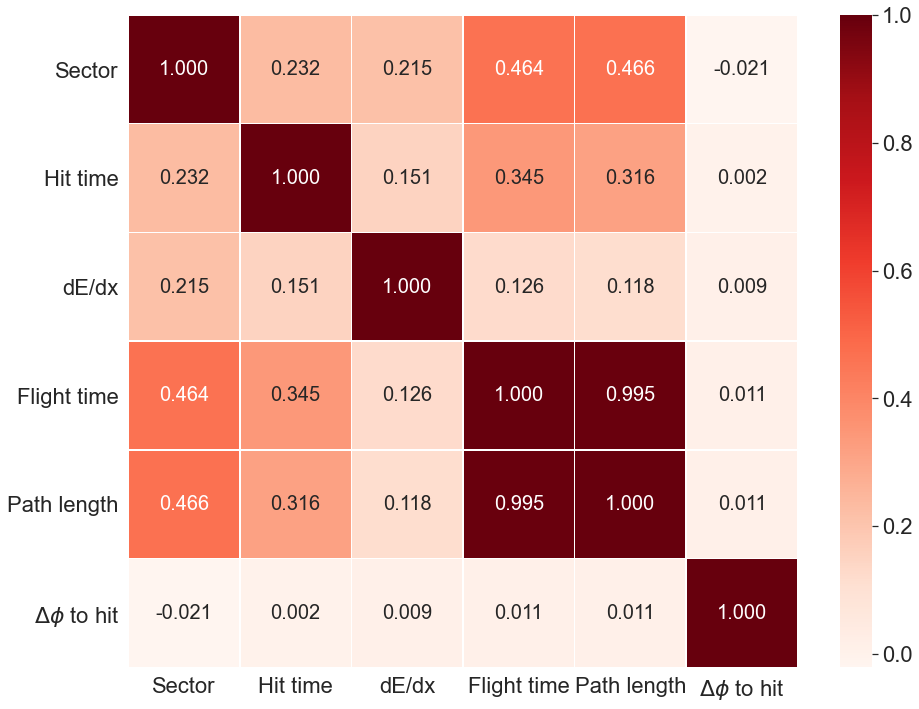

In [5]:
pid.set_features(SC_features)
axis_label_list = ['Sector','Hit time','dE/dx','Flight time','Path length', r'$\Delta \phi$ to hit']
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='SC_feaure_heatmap.pdf',xticklabels=axis_label_list,yticklabels=axis_label_list)
for feature in SC_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

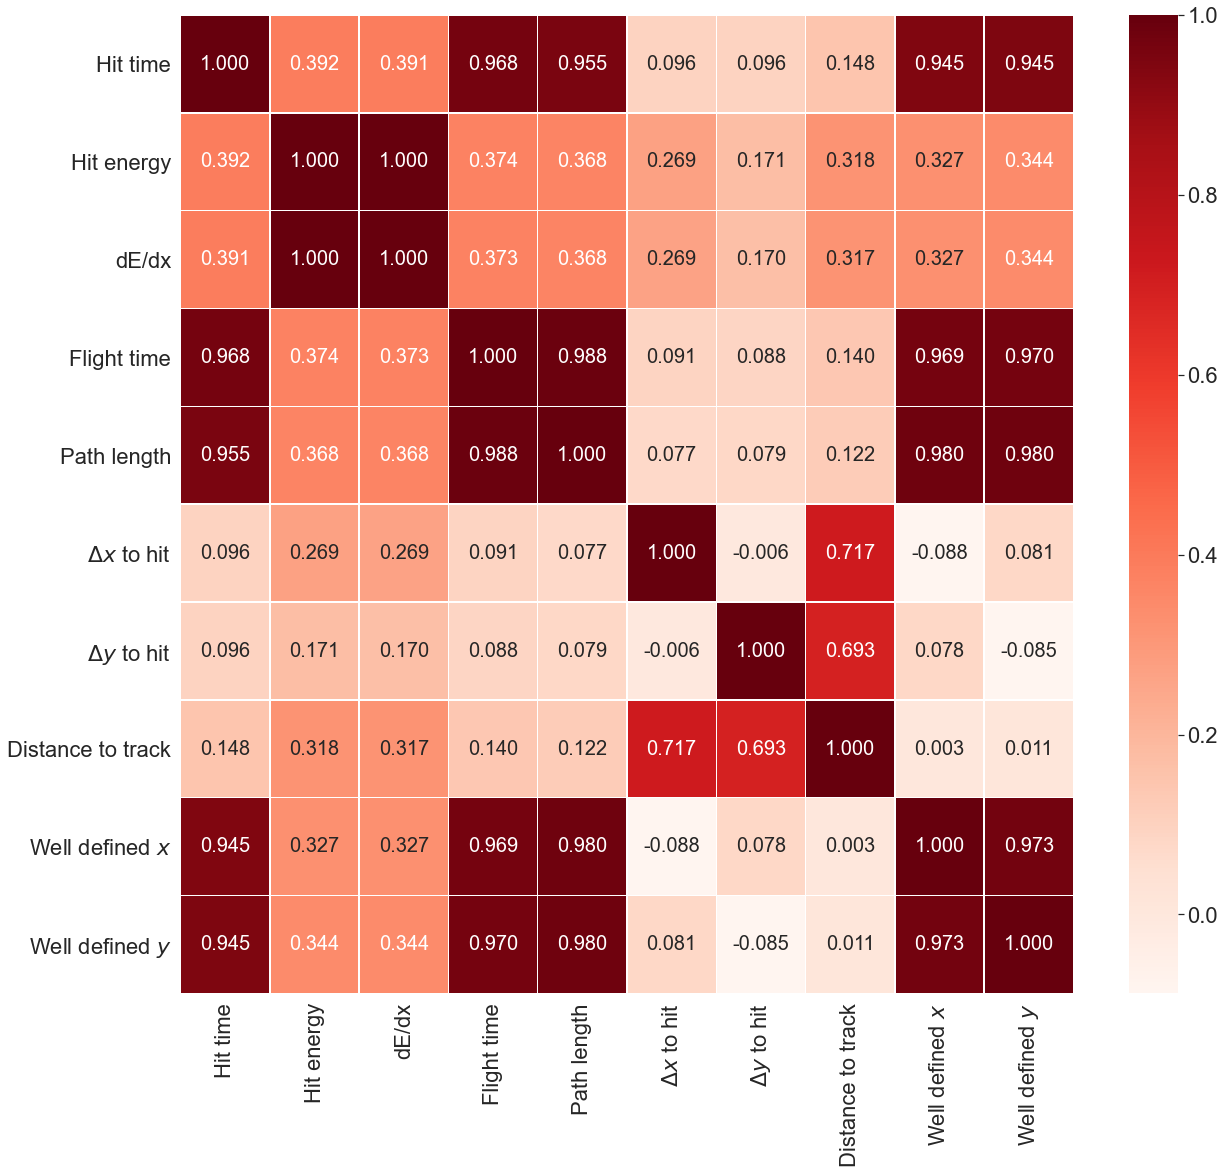

In [6]:
pid.set_features(TOF_features)
axis_label_list = ['Hit time','Hit energy','dE/dx','Flight time','Path length', r'$\Delta x$ to hit',r'$\Delta y$ to hit','Distance to track',r'Well defined $x$',r'Well defined $y$']
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='TOF_feaure_heatmap.pdf',figsize=(20,18),xticklabels=axis_label_list,yticklabels=axis_label_list)#,sizeIssue=True)
for feature in TOF_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

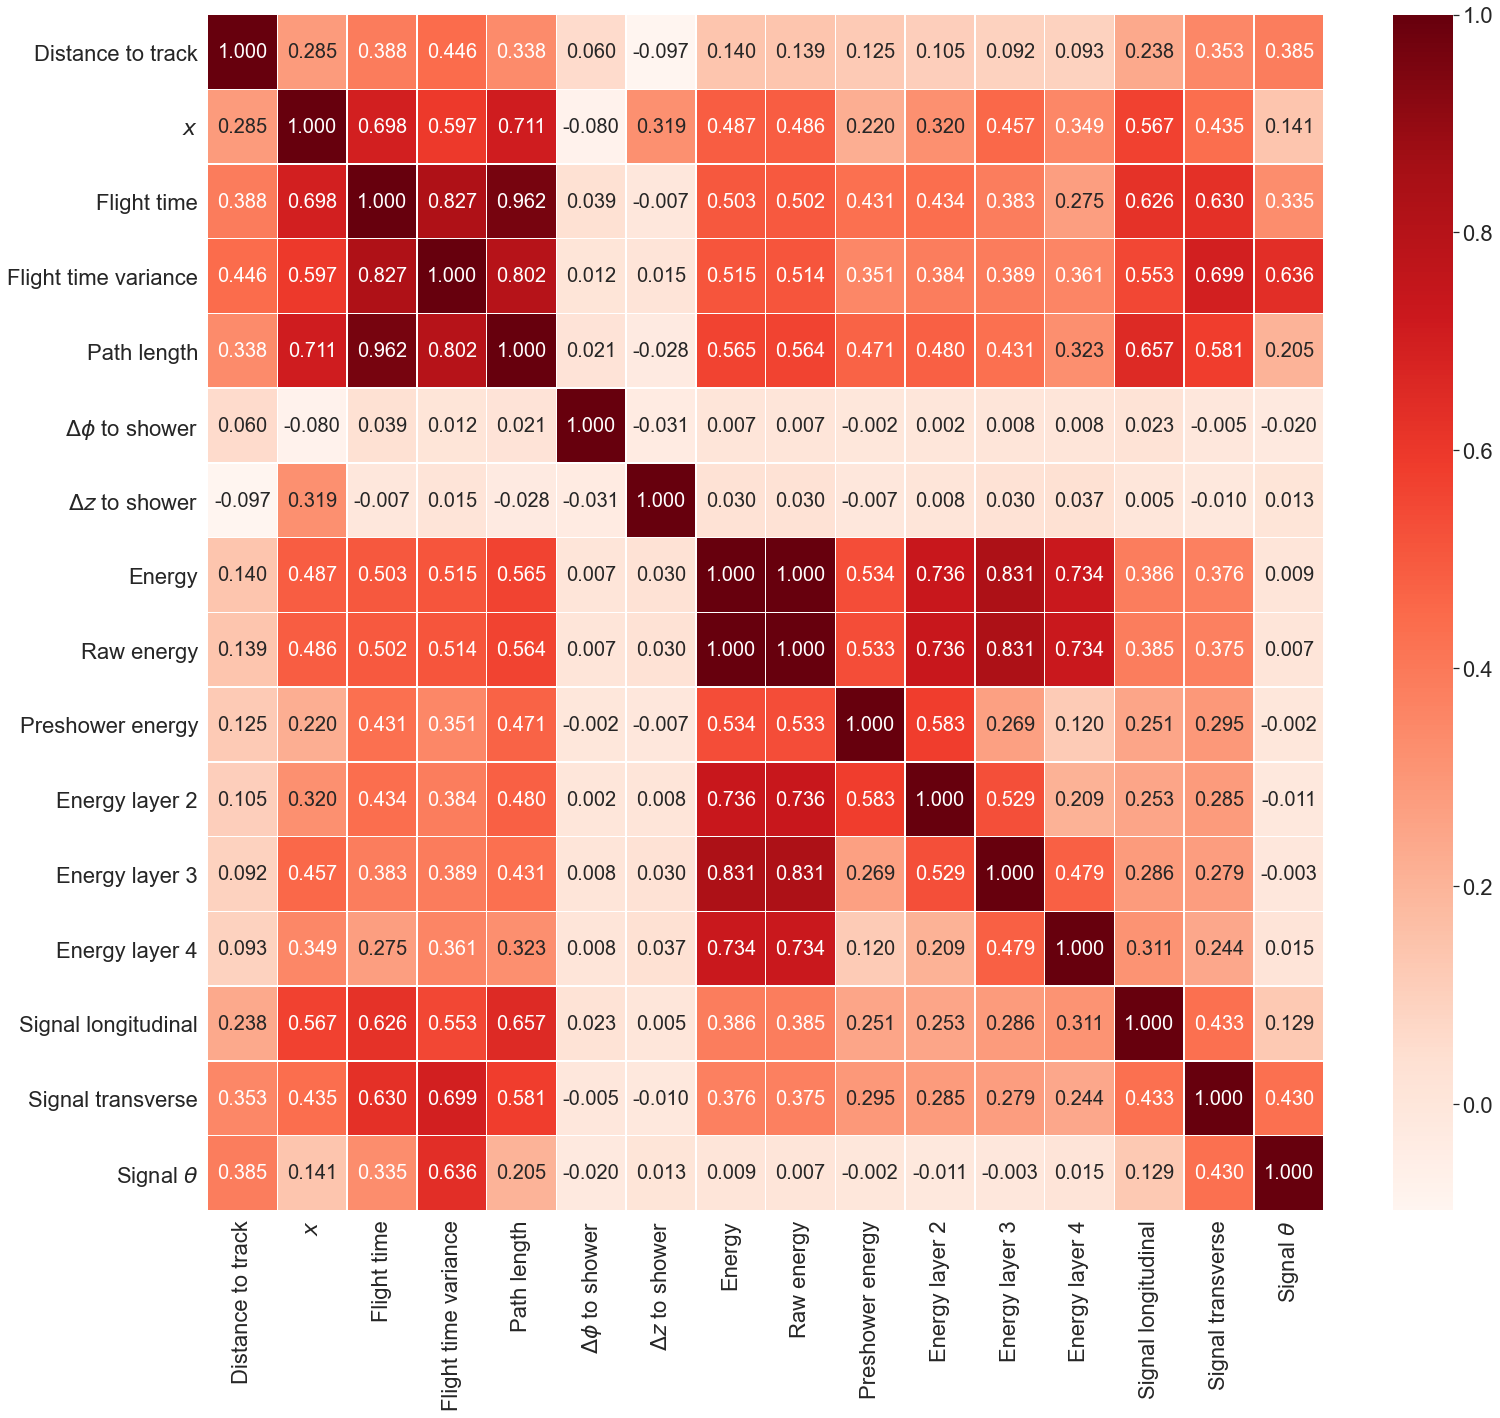

In [10]:
pid.set_features(BCAL_features)
axis_label_list = ['Distance to track','$x$','Flight time','Flight time variance', r'Path length',r'$\Delta \phi$ to shower',r'$\Delta z$ to shower','Energy','Raw energy','Preshower energy','Energy layer 2','Energy layer 3','Energy layer 4','Signal longitudinal','Signal transverse',r'Signal $\theta$']
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='BCAL_feaure_heatmap.pdf',figsize=(25,22),xticklabels=axis_label_list,yticklabels=axis_label_list)
for feature in BCAL_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

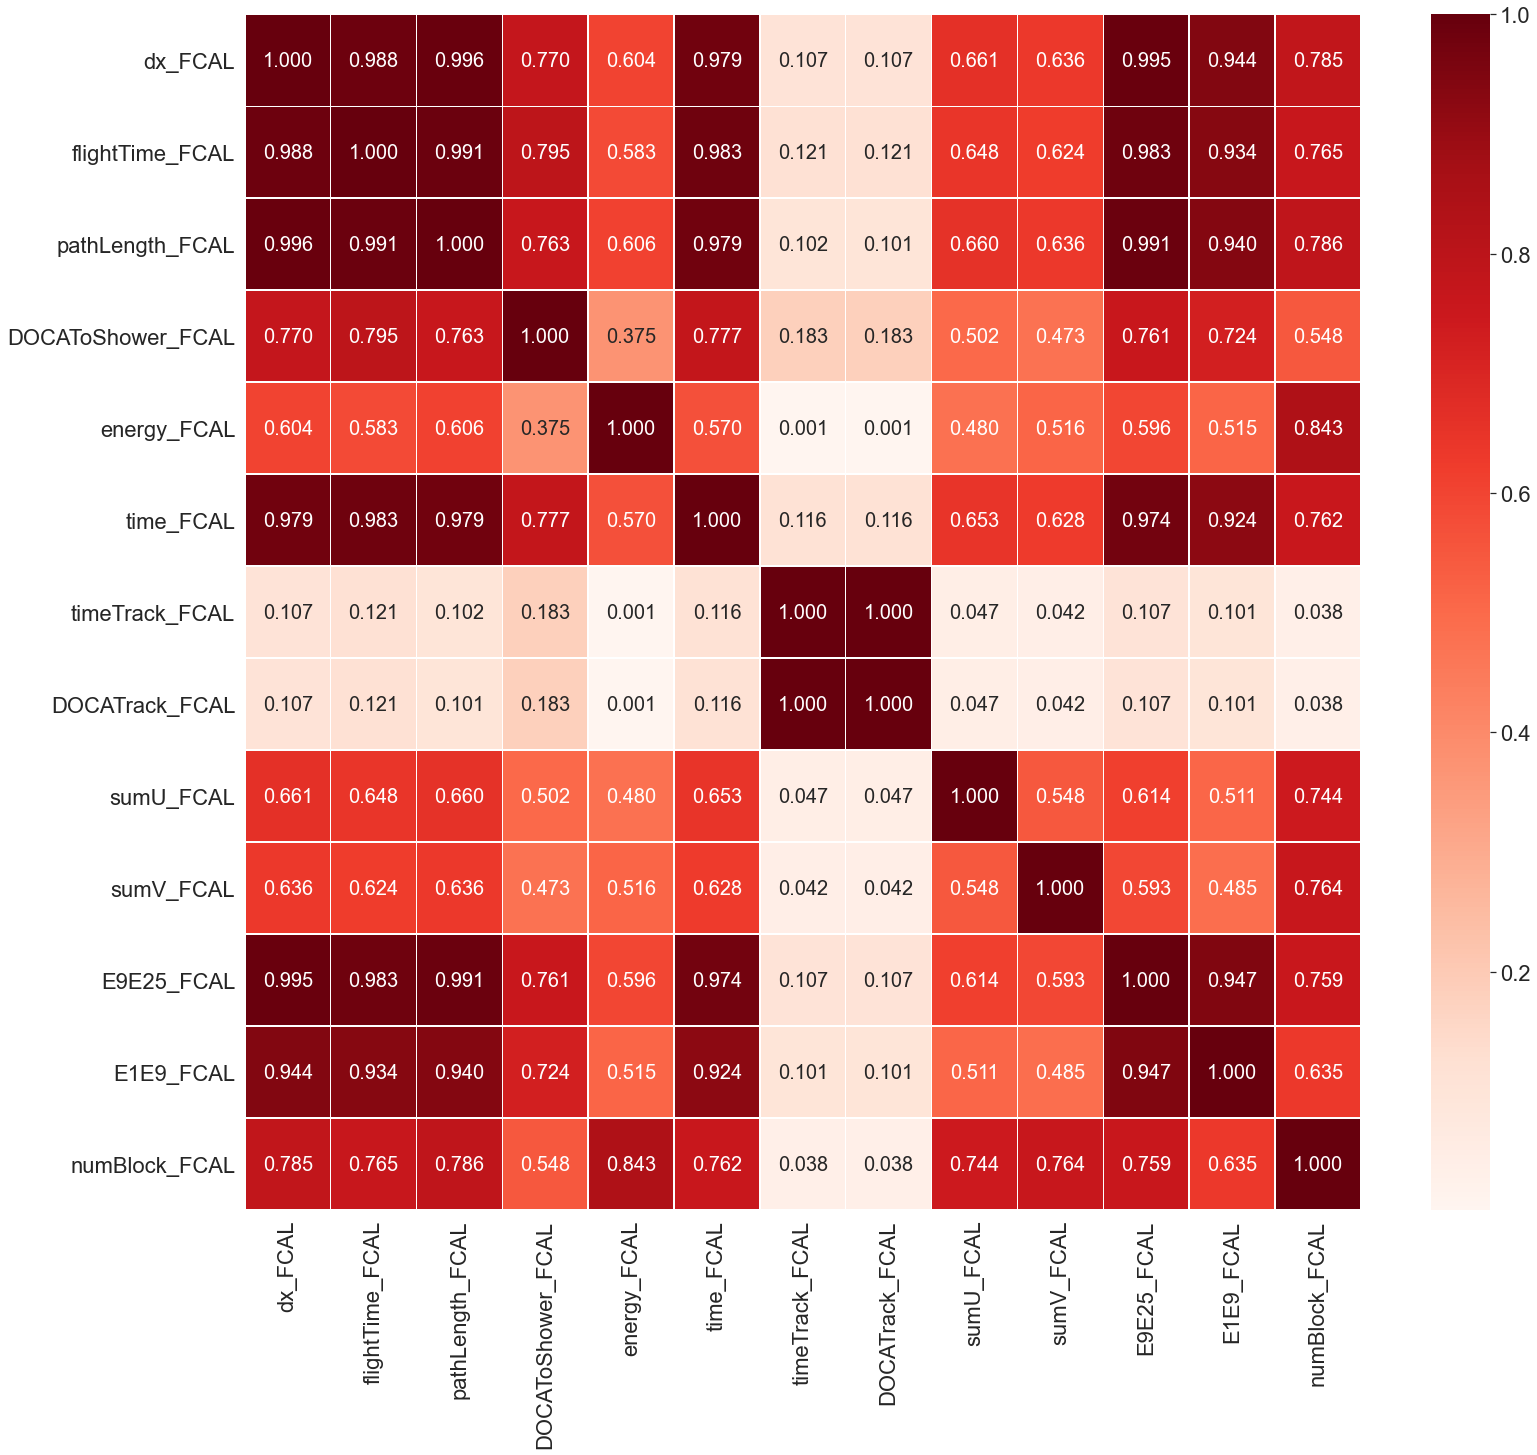

In [12]:
pid.set_features(FCAL_features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='FCAL_feaure_heatmap.pdf',figsize=(25,22))#,xticklabels=axis_label_list,yticklabels=axis_label_list)
for feature in FCAL_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

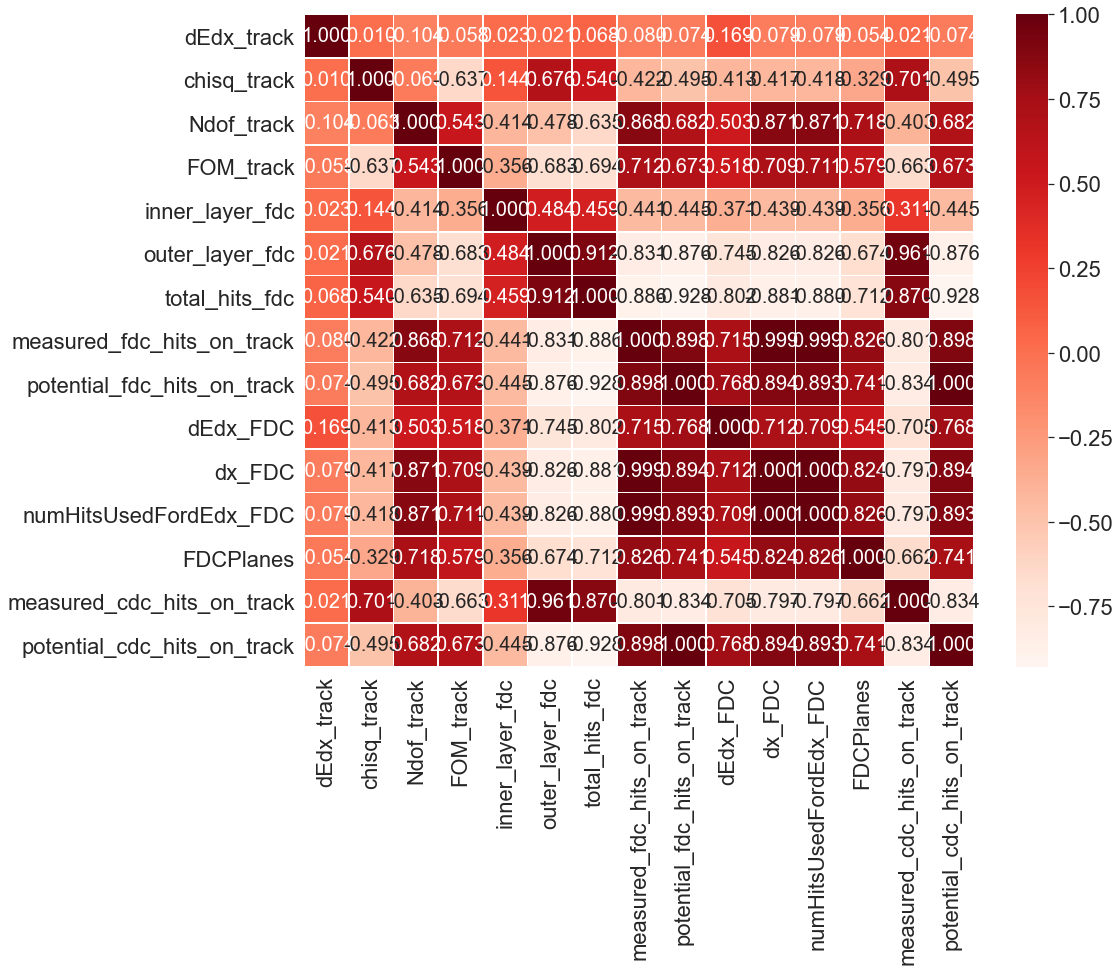

In [13]:
pid.set_features(FDC_features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='FDC_feaure_heatmap.pdf')
for feature in FDC_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

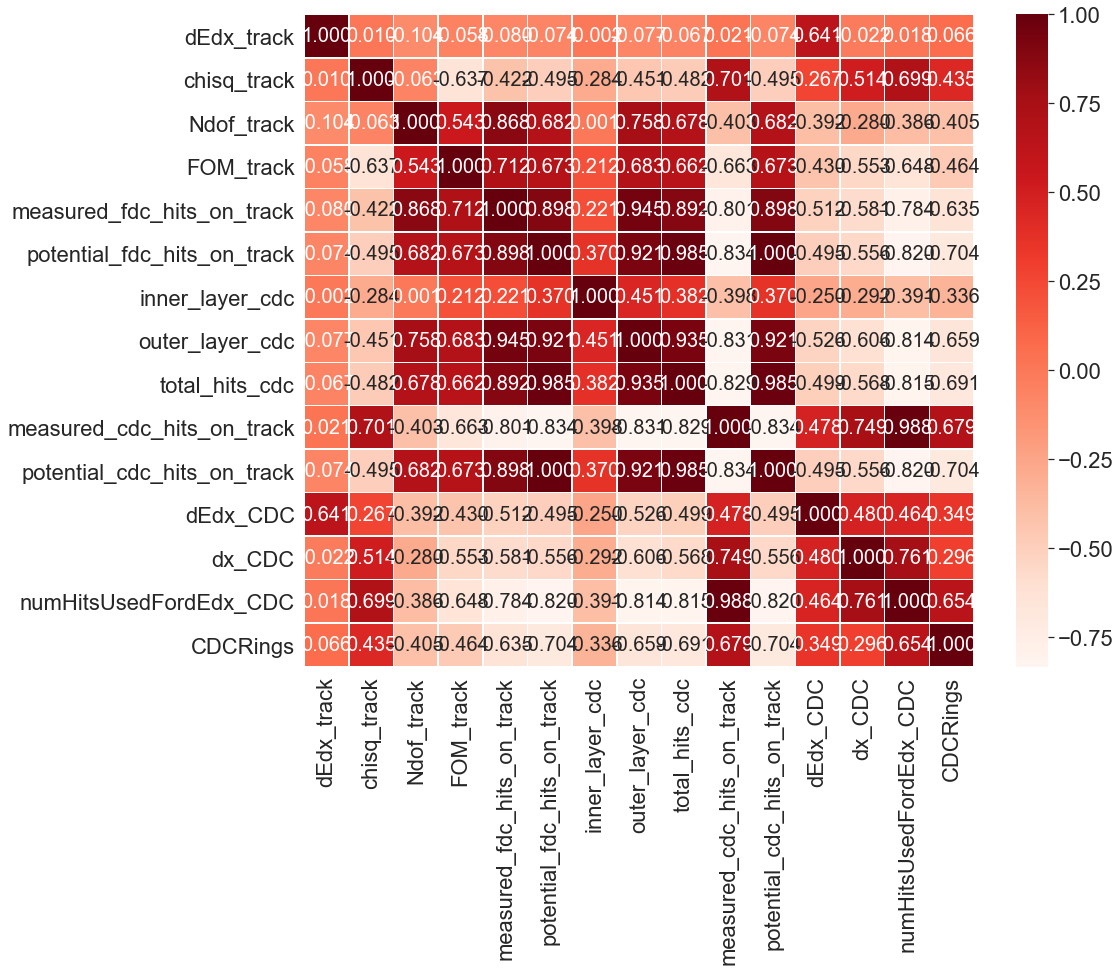

In [14]:
pid.set_features(CDC_features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='CDC_feaure_heatmap.pdf')
for feature in CDC_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

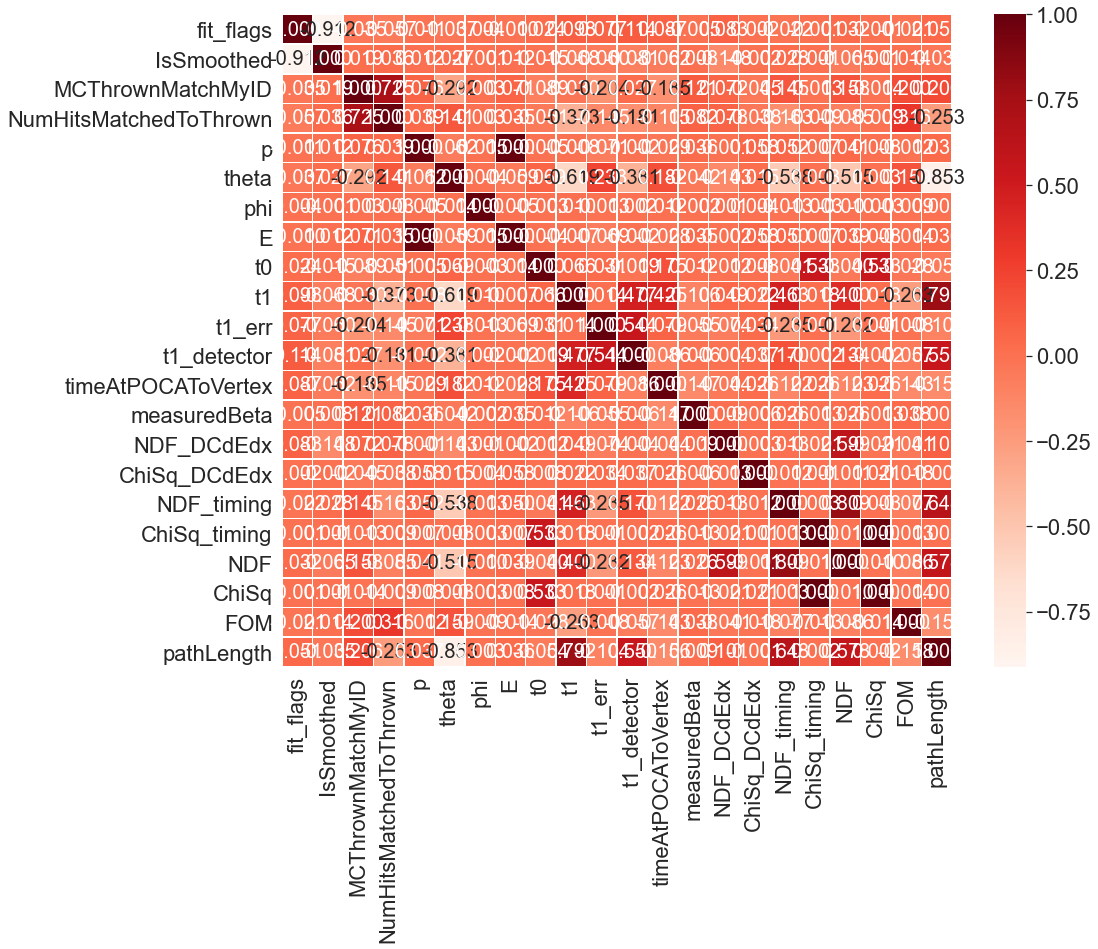

In [15]:
pid.set_features(lo_features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='recon_feaure_heatmap.pdf')
for feature in lo_features:
    cor_target = abs(pid.corr[feature])
    #print(feature,":")
    #print(cor_target[cor_target>0.5])
    #print('\n\n')

['dEdx_SC', 'deltaPhiToHit_SC', 'dEdx_TOF', 'deltaXToHit_TOF', 'deltaYToHit_TOF', 'distanceToTrack_TOF', 'distanceToTrack_BCAL', 'dx_BCAL', 'deltaPhitoShower_BCAL', 'deltaZToShower_BCAL', 'E_BCAL', 'E_preshower_BCAL', 'E_L2_BCAL', 'E_L3_BCAL', 'E_L4_BCAL', 'sigLong_BCAL', 'sigTrans_BCAL', 'sigTheta_BCAL', 'energy_FCAL', 'DOCATrack_FCAL', 'sumU_FCAL', 'sumV_FCAL', 'E9E25_FCAL', 'E1E9_FCAL', 'chisq_track', 'Ndof_track', 'dEdx_FDC', 'dx_FDC', 'dEdx_CDC', 'dx_CDC', 'p', 'theta', 't0', 't1', 'timeAtPOCAToVertex', 'measuredBeta', 'FOM']


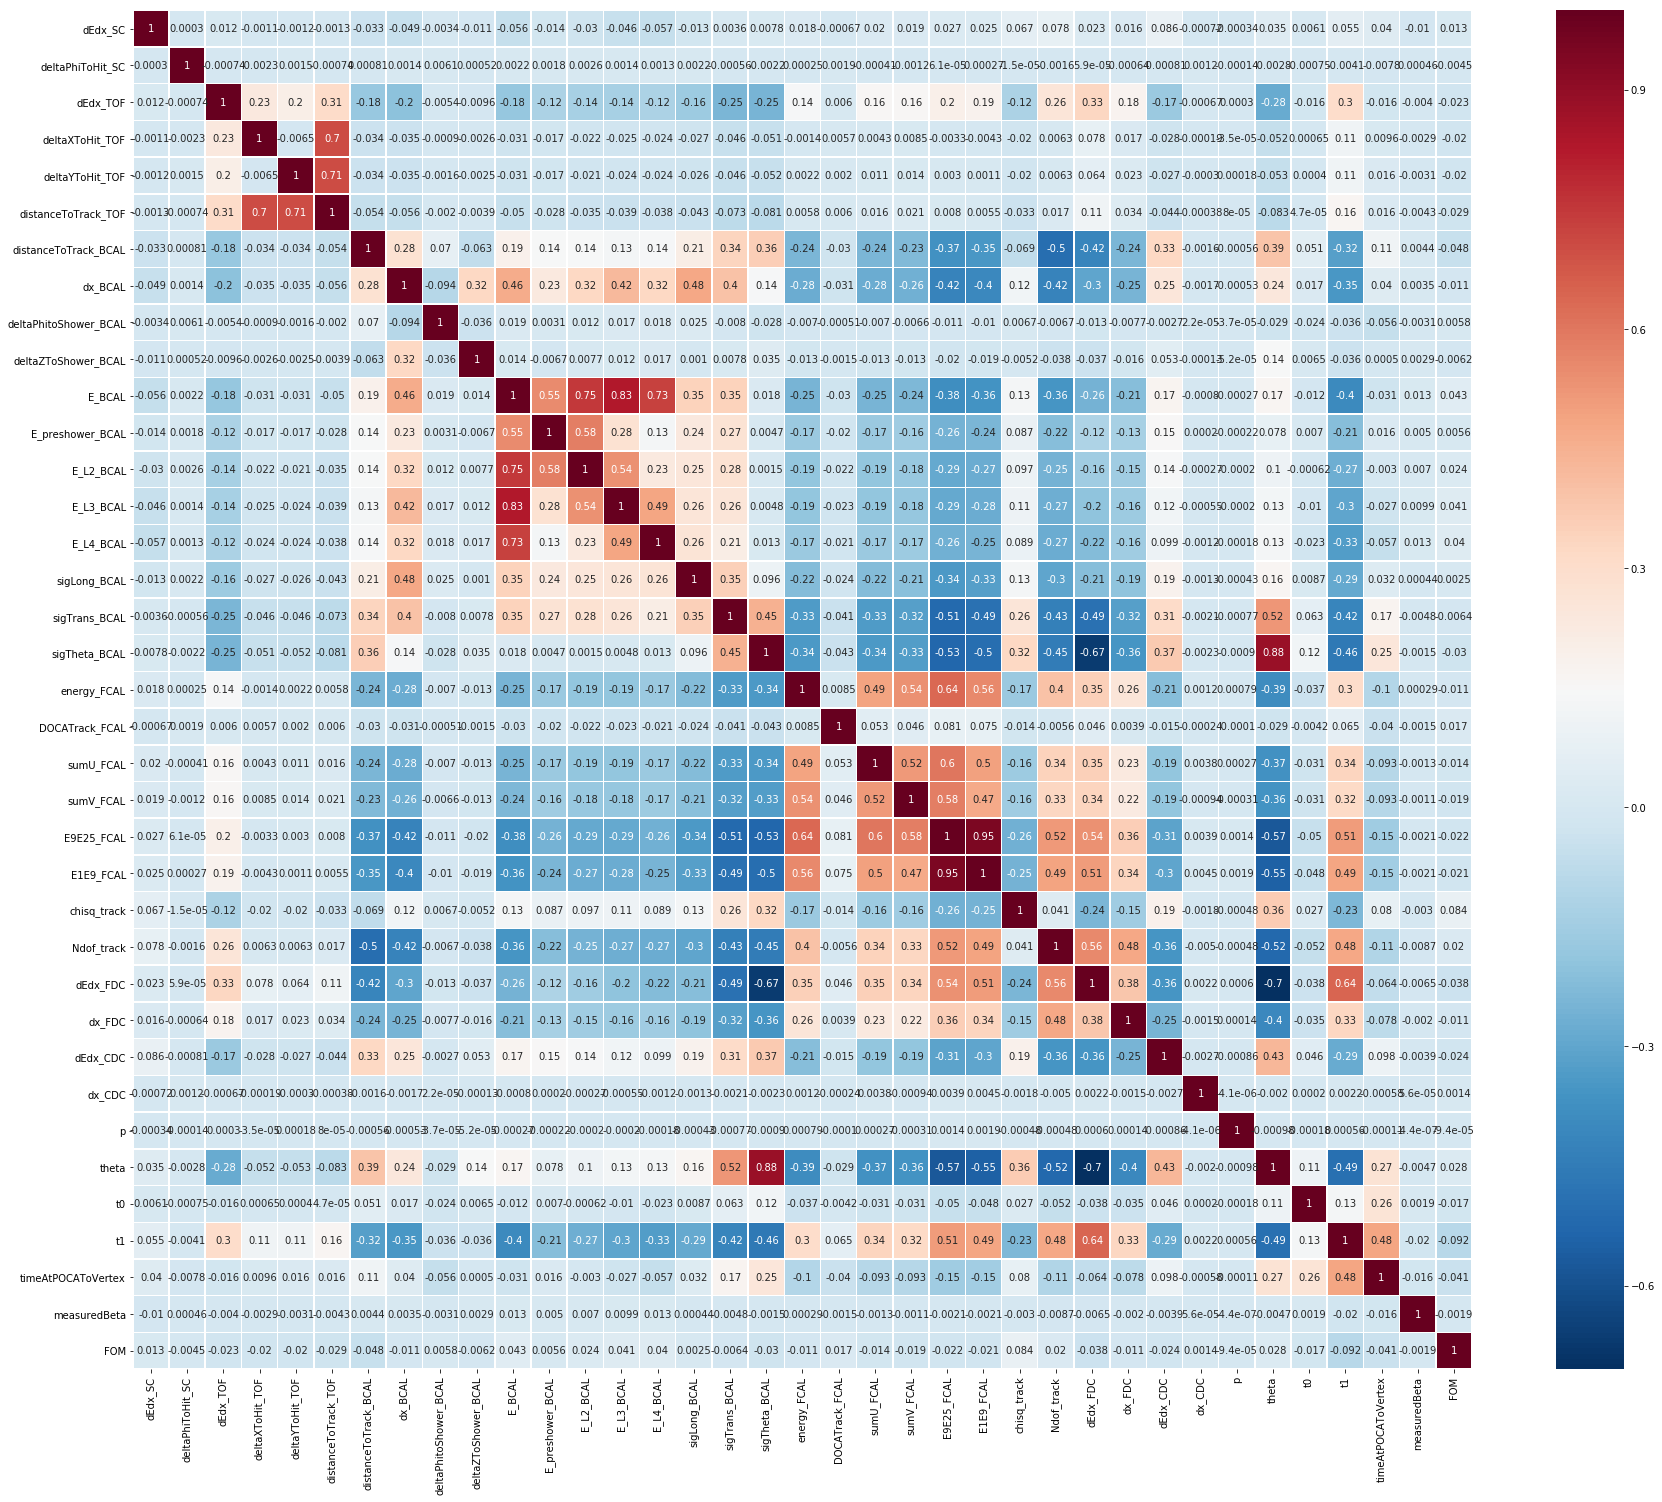

In [36]:
initial_features = ['dEdx_SC','deltaPhiToHit_SC','dEdx_TOF','deltaXToHit_TOF','deltaYToHit_TOF','distanceToTrack_TOF','distanceToTrack_BCAL','dx_BCAL','deltaPhitoShower_BCAL','deltaZToShower_BCAL','E_BCAL','E_preshower_BCAL','E_L2_BCAL','E_L3_BCAL','E_L4_BCAL','sigLong_BCAL','sigTrans_BCAL','sigTheta_BCAL','energy_FCAL','DOCATrack_FCAL','sumU_FCAL','sumV_FCAL','E9E25_FCAL','E1E9_FCAL','chisq_track','Ndof_track','dEdx_FDC','dx_FDC','dEdx_CDC','dx_CDC','p','theta','t0','t1','timeAtPOCAToVertex','measuredBeta','FOM']
print(initial_features)
pid.set_features(initial_features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='initial_features_heatmap.pdf',figsize=(30,25))

pid_pr.set_features(pid_pr.pid.columns[1:len(pid_pr.pid.columns)-1])
pid_pr.binarize_y()
pid_pr.correlation_coefficients()
#pid_pr.cc_heatmap()
print(pid_pr.X.columns)

for feature in pid_pr.X.columns:
    cor_target = abs(pid_pr.corr[feature])
    print(feature,":")
    print(cor_target[cor_target>0.5])
    print('\n\n')

from pandas import read_json, concat, melt
import seaborn as sns
from math import pi
%matplotlib inline

sns.set(style='white')
 
sns.distplot(pid_ep.pid['theta']*180.0/pi)
    
#g = sns.PairGrid(pid_ep.pid['theta'], diag_sharey=False)
#g.map_upper(sns.scatterplot)
#g.map_lower(sns.scatterplot)
#g.map_diag(plt.hist)
#g.savefig('Single_particle_features.png')

['dEdx_SC', 'dEdx_TOF', 'E_BCAL', 'energy_FCAL', 'dEdx_FDC', 'dEdx_CDC', 'p', 'theta']


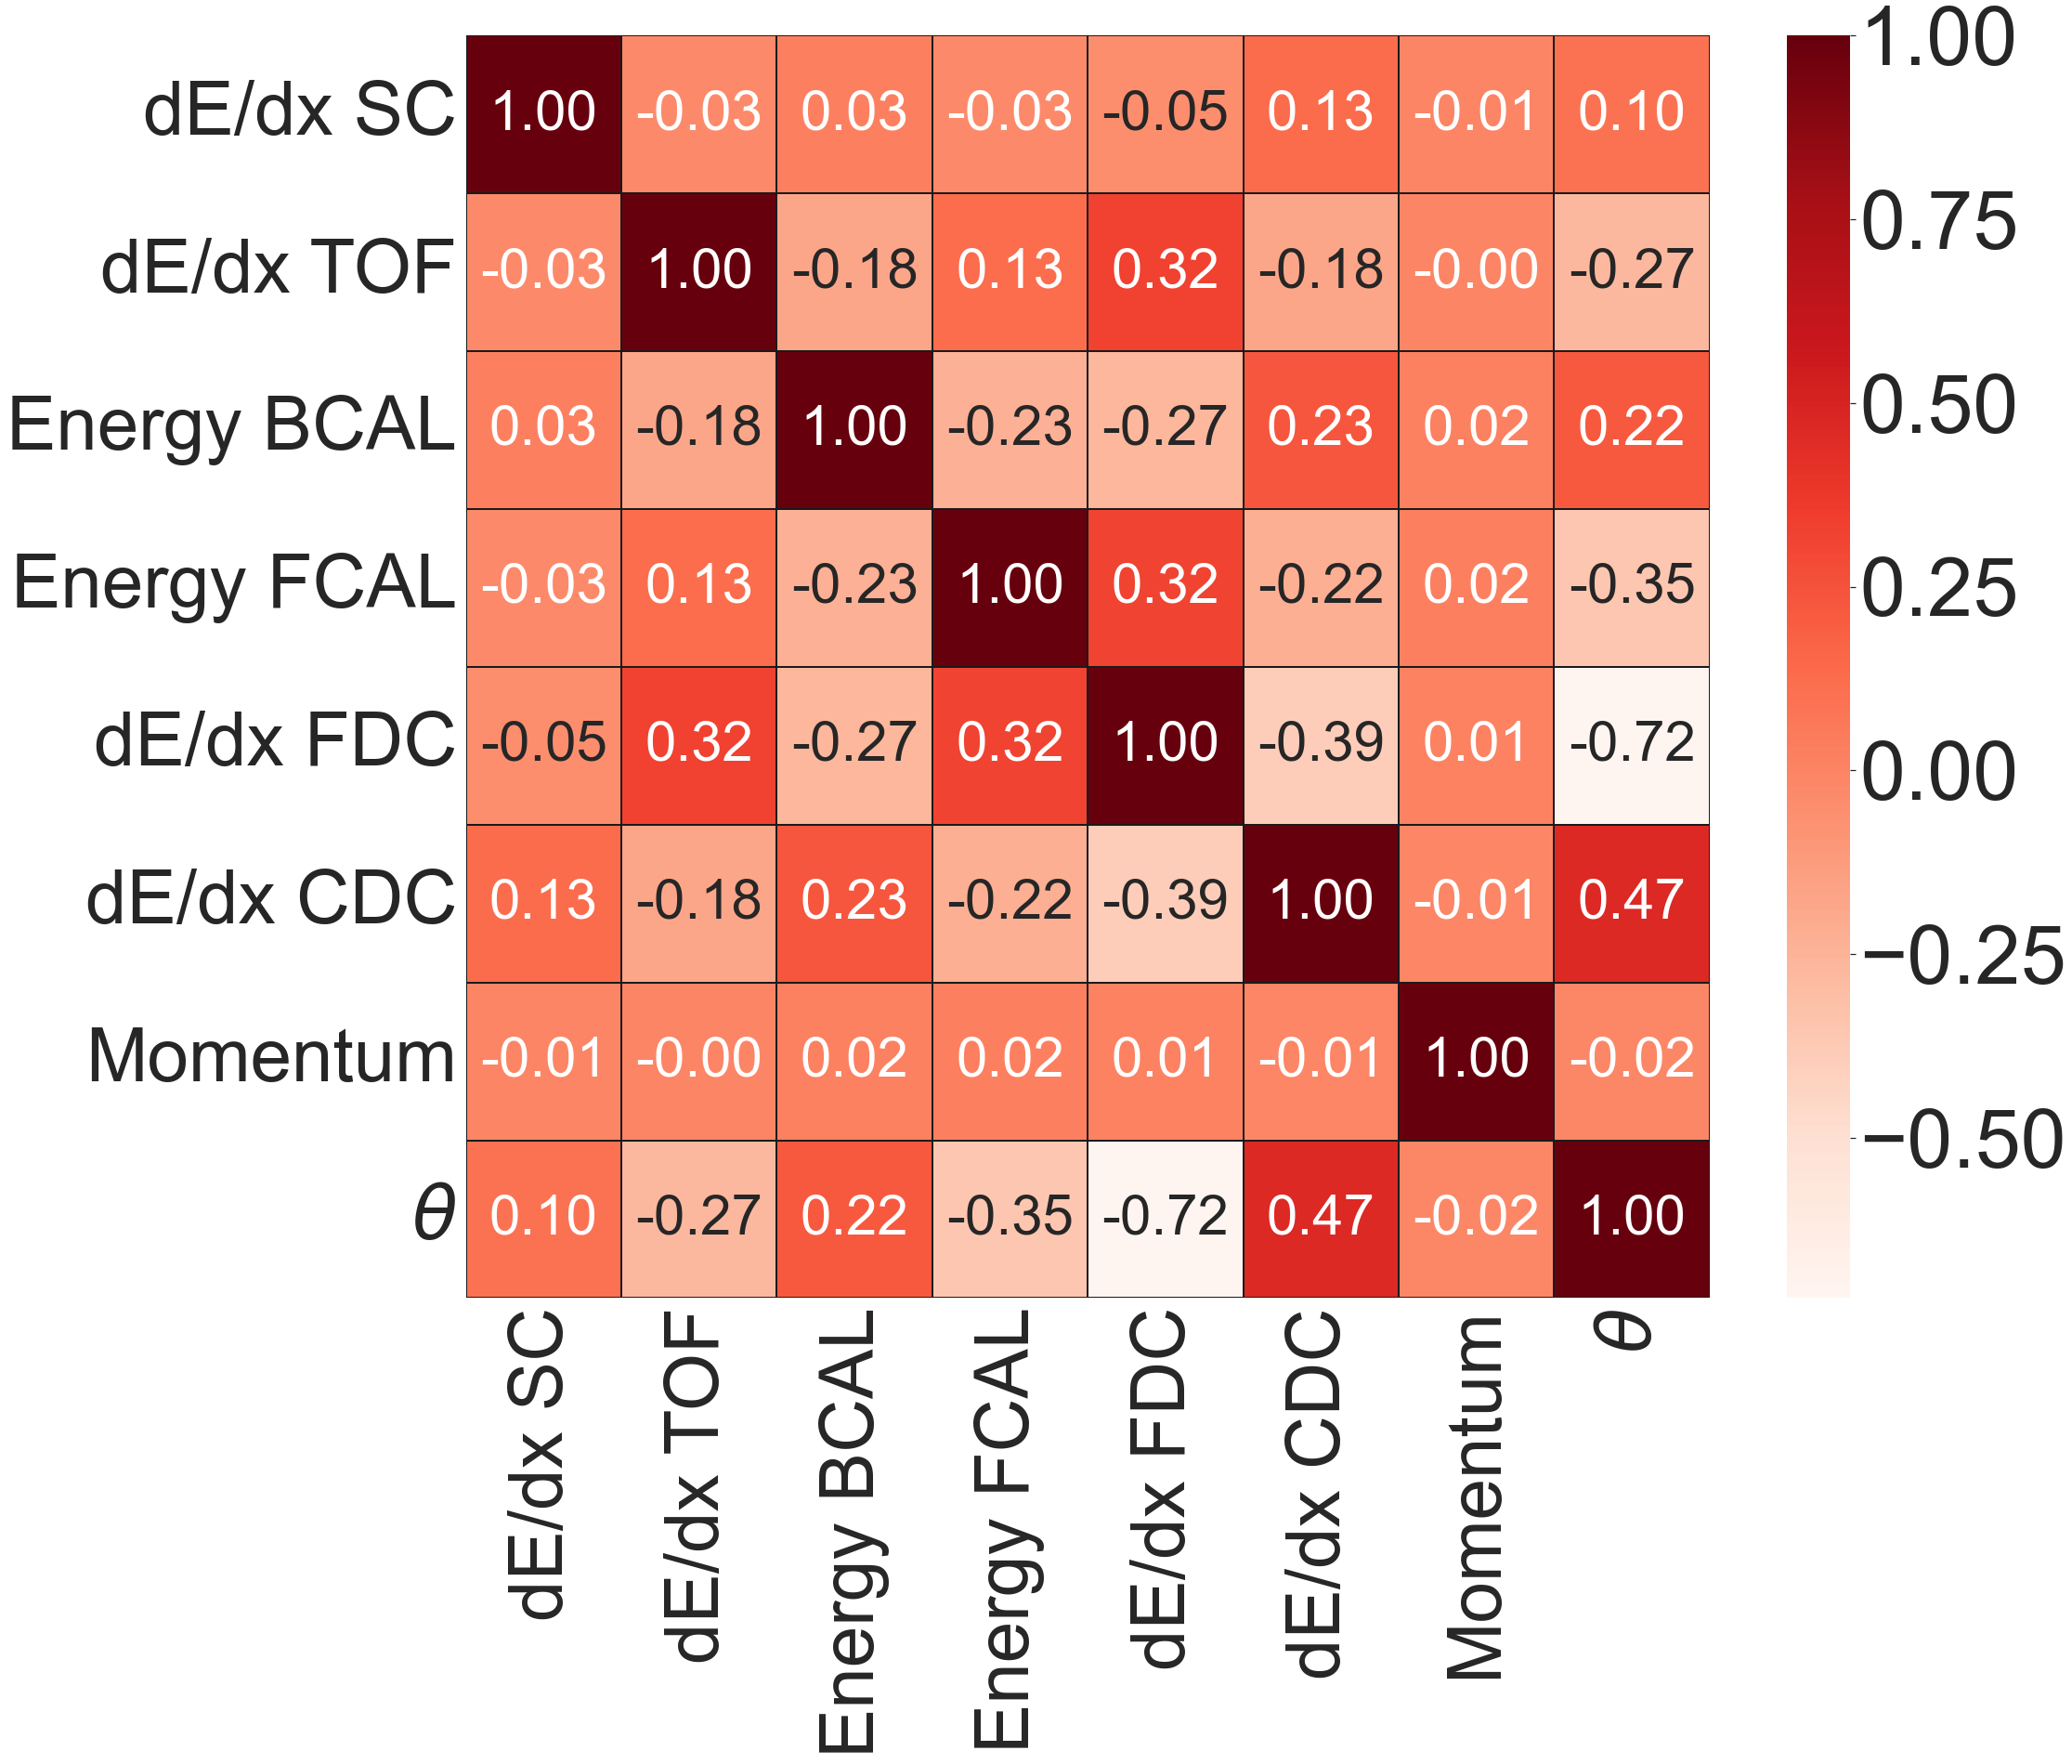

In [4]:
initial_features = ['dEdx_SC','dEdx_TOF','E_BCAL','energy_FCAL','dEdx_FDC','dEdx_CDC','p','theta']
axis_label_list = ['dE/dx SC','dE/dx TOF','Energy BCAL','Energy FCAL','dE/dx FDC','dE/dx CDC','Momentum',r'$\theta$']
print(initial_features)
pid.set_features(initial_features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='features_heatmap.pdf',figsize=(30,25),xticklabels=axis_label_list,yticklabels=axis_label_list)

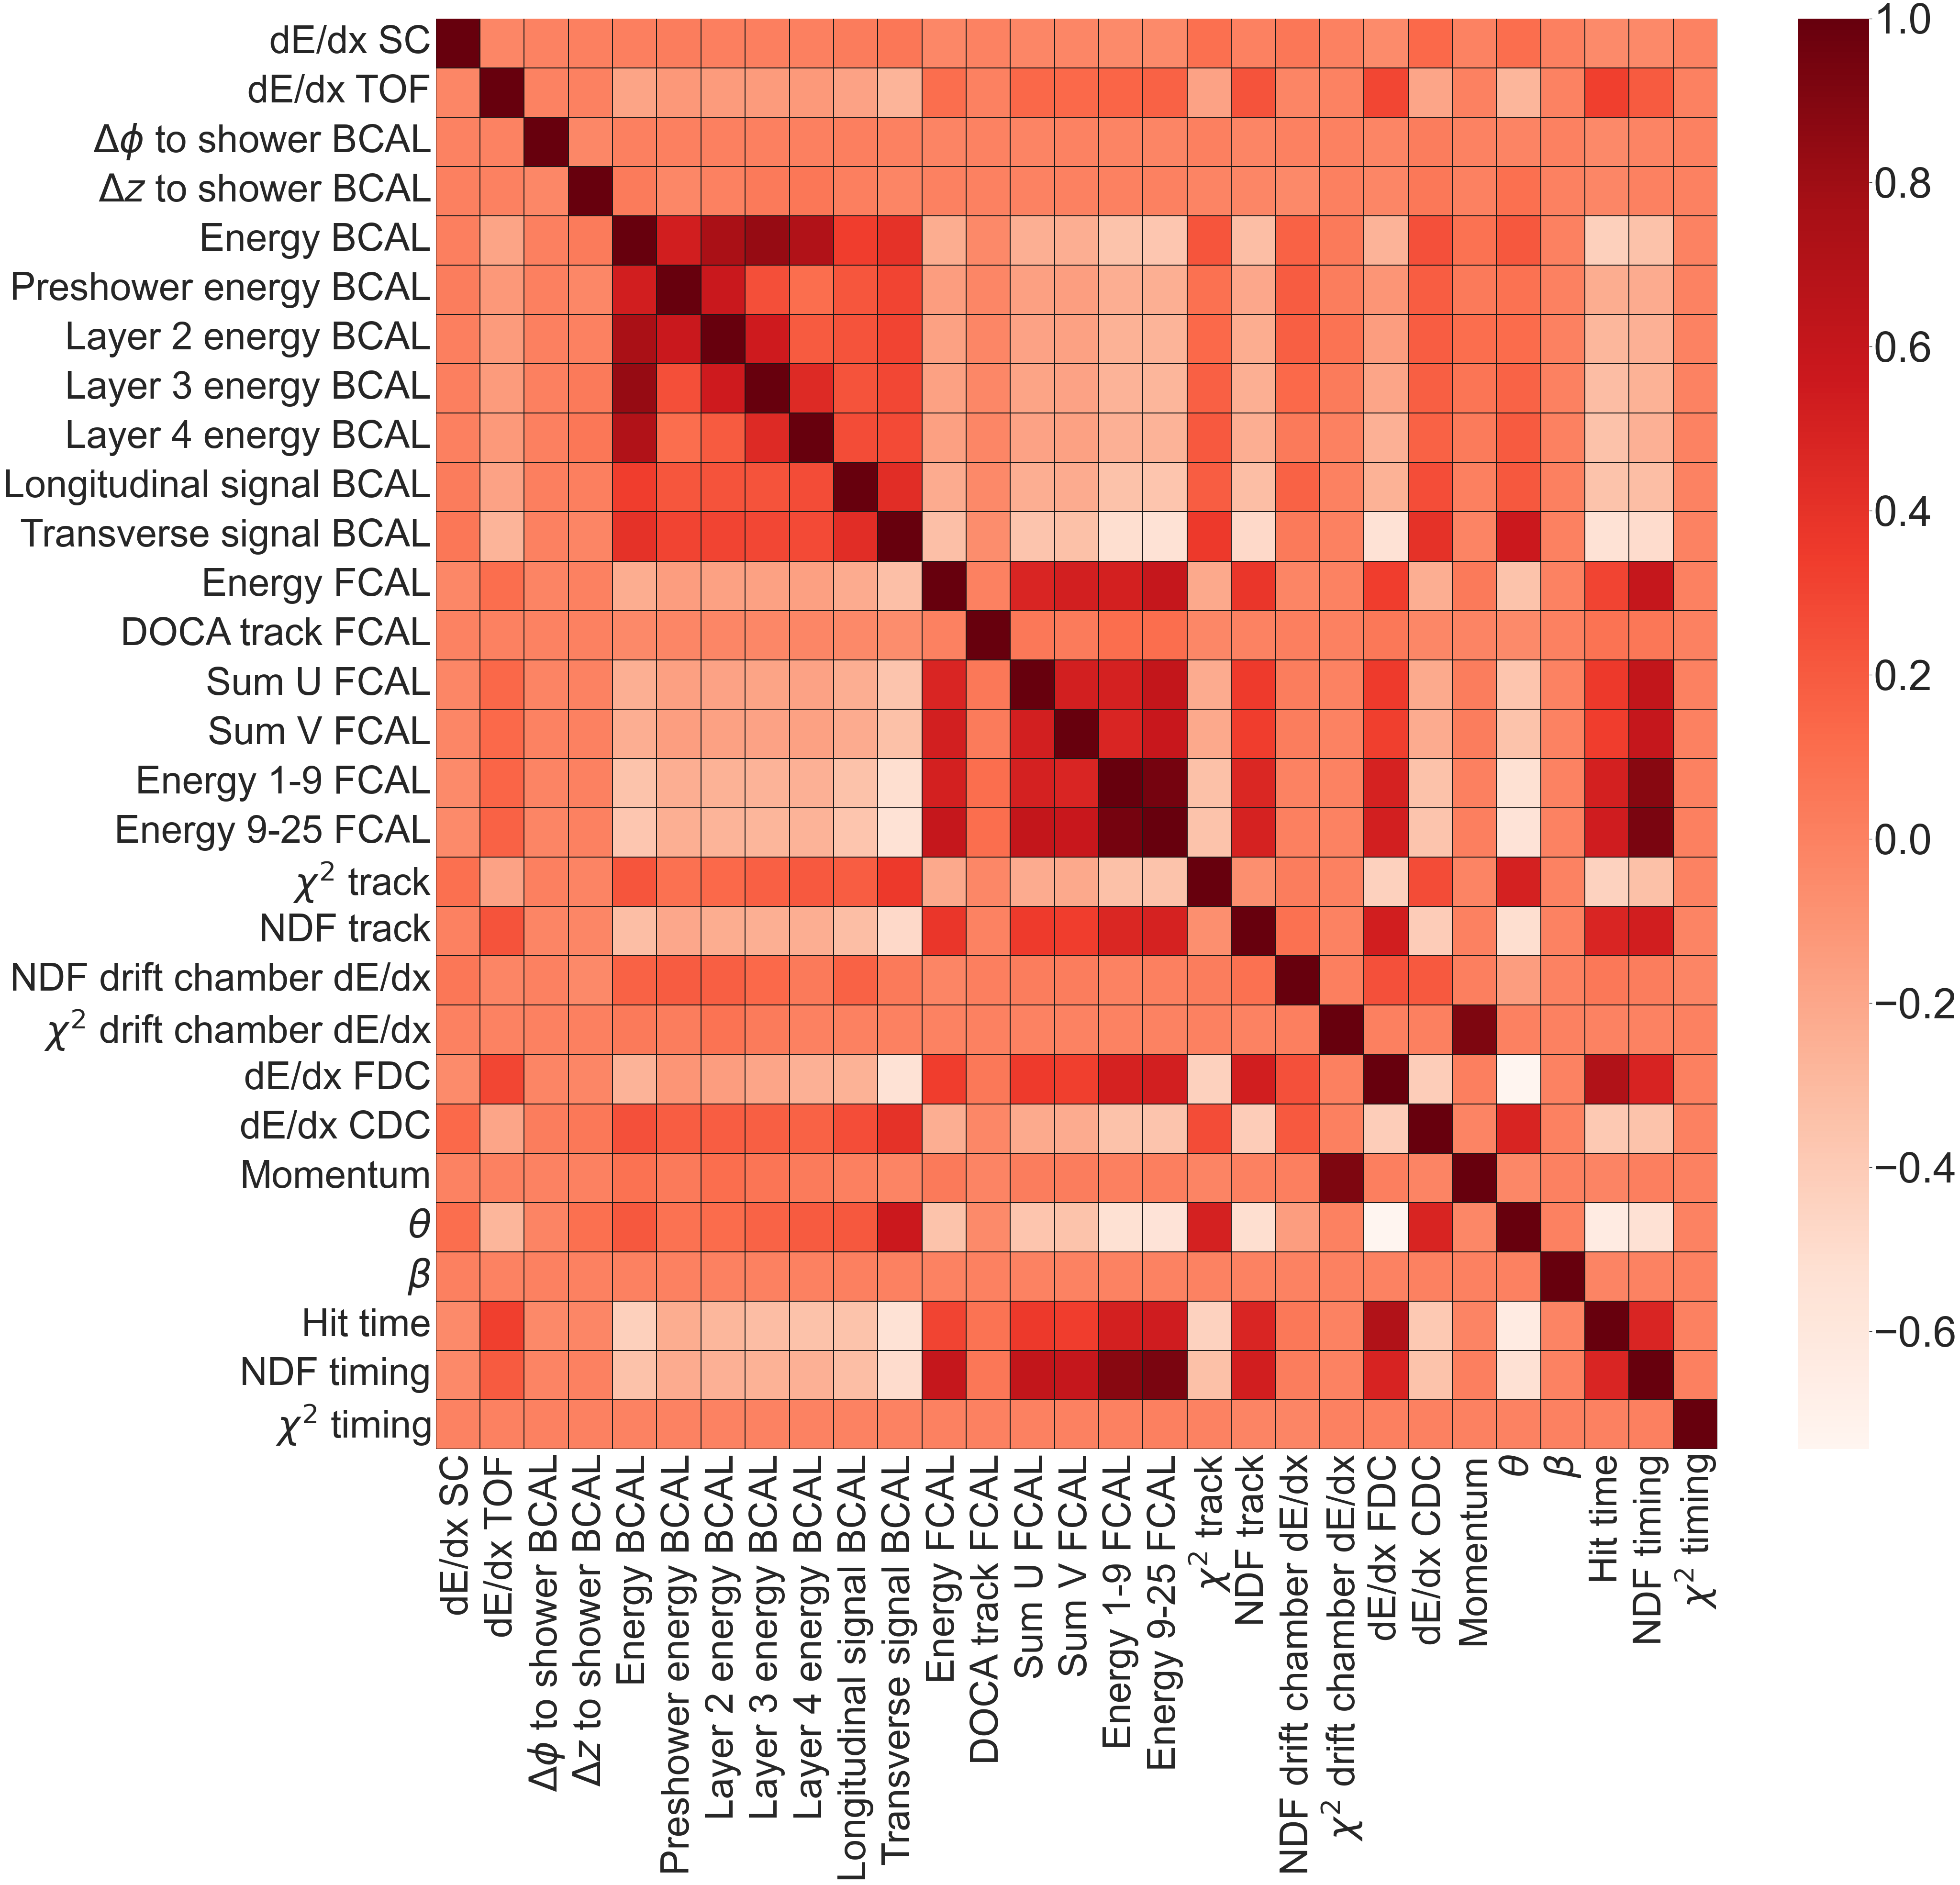

In [4]:
features = ['dEdx_SC','dEdx_TOF','deltaPhitoShower_BCAL','deltaZToShower_BCAL','E_BCAL','E_preshower_BCAL','E_L2_BCAL','E_L3_BCAL','E_L4_BCAL','sigLong_BCAL','sigTrans_BCAL','energy_FCAL','DOCATrack_FCAL','sumU_FCAL','sumV_FCAL','E1E9_FCAL','E9E25_FCAL','chisq_track','Ndof_track','NDF_DCdEdx','ChiSq_DCdEdx','dEdx_FDC','dEdx_CDC','p','theta','measuredBeta','t1','NDF_timing','ChiSq_timing']
axis_label_list = ['dE/dx SC','dE/dx TOF',r'$\Delta\phi$ to shower BCAL',r'$\Delta z$ to shower BCAL','Energy BCAL','Preshower energy BCAL','Layer 2 energy BCAL','Layer 3 energy BCAL','Layer 4 energy BCAL','Longitudinal signal BCAL','Transverse signal BCAL','Energy FCAL','DOCA track FCAL','Sum U FCAL','Sum V FCAL','Energy 1-9 FCAL','Energy 9-25 FCAL',r'$\chi^{2}$ track','NDF track','NDF drift chamber dE/dx',r'$\chi^{2}$ drift chamber dE/dx','dE/dx FDC','dE/dx CDC','Momentum',r'$\theta$',r'$\beta$','Hit time','NDF timing',r'$\chi^{2}$ timing']
pid.set_features(features)
pid.correlation_coefficients()
pid.cc_heatmap(plot_name='features_heatmap.pdf',figsize=(60,55),xticklabels=axis_label_list,yticklabels=axis_label_list)